# Project : Data Visualization (Ford GoBike System Data) 
### (January 2018 - December 2018)

#### By- Tariq Alam

## Introduction

> [Bay Wheels](https://en.wikipedia.org/wiki/Bay_Wheels) (previously known as Ford GoBike) is a regional public bike sharing system in the San Francisco Bay Area, California. Bay Wheels is the first regional and large-scale bicycle sharing system deployed in California and on the West Coast of the United States with nearly 500,000 rides since the launch in 2017 and had about 10,000 annual subscribers as of January 2018. This exploration and visualization study primarily focuses on finding the bike usage pattern and customer habit characteristics from the 12-month ride trips data in 2018.

## Dataset Overview

> The dataset used for this exploratory analysis consists of [monthly individual trip data](https://www.lyft.com/bikes/bay-wheels/system-data) from January 2018 to December 2018 in CSV format covering the greater San Francisco Bay area, raw data is available [here](https://s3.amazonaws.com/baywheels-data/index.html). Visualizations below are created from wrangled and cleaned data to facilitate exploration analysis and help discover usage pattern and rider characteristics.

In [67]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [68]:
# load in the dataset into a pandas dataframe and clean up field dtypes
df = pd.read_csv('fordgobike-tripdata-201801-201812combined.csv')

In [69]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,75284,2018-01-31 22:52:35.2390,2018-02-01 19:47:19.8240,120.0,Mission Dolores Park,37.761420,-122.426435,285.0,Webster St at O'Farrell St,37.783521,-122.431158,2765,Subscriber,1986.0,Male,No
1,85422,2018-01-31 16:13:34.3510,2018-02-01 15:57:17.3100,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,2815,Customer,NaN,NaN,No
2,71576,2018-01-31 14:23:55.8890,2018-02-01 10:16:52.1160,304.0,Jackson St at 5th St,37.348759,-121.894798,296.0,5th St at Virginia St,37.325998,-121.877120,3039,Customer,1996.0,Male,No
3,61076,2018-01-31 14:53:23.5620,2018-02-01 07:51:20.5000,75.0,Market St at Franklin St,37.773793,-122.421239,47.0,4th St at Harrison St,37.780955,-122.399749,321,Customer,NaN,NaN,No
4,39966,2018-01-31 19:52:24.6670,2018-02-01 06:58:31.0530,74.0,Laguna St at Hayes St,37.776435,-122.426244,19.0,Post St at Kearny St,37.788975,-122.403452,617,Subscriber,1991.0,Male,No


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1863721 entries, 0 to 1863720
Data columns (total 16 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   duration_sec             int64  
 1   start_time               object 
 2   end_time                 object 
 3   start_station_id         float64
 4   start_station_name       object 
 5   start_station_latitude   float64
 6   start_station_longitude  float64
 7   end_station_id           float64
 8   end_station_name         object 
 9   end_station_latitude     float64
 10  end_station_longitude    float64
 11  bike_id                  int64  
 12  user_type                object 
 13  member_birth_year        float64
 14  member_gender            object 
 15  bike_share_for_all_trip  object 
dtypes: float64(7), int64(2), object(7)
memory usage: 227.5+ MB


## User Types and Their Monthly Usage

>Subscribers contributed the majority of the bike usage in 2018, about 85%, while about 15% were consumed by cusomters (or casual users). Both subscribers and customers ride the most during the summer months with subscribers maxed out in October and customers peaked in July. The usage was clearly not popular during winter season like November, December and January likely due to the weather.

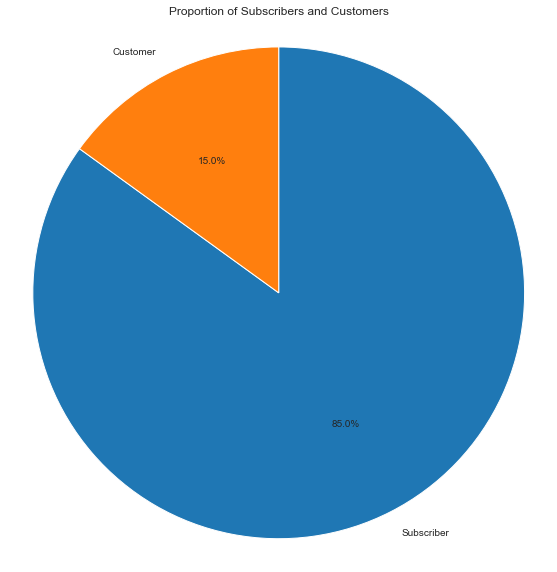

In [78]:
plt.figure(figsize = [10, 10])
sorted_counts = df['user_type'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90, counterclock = False,autopct='%.1f%%');
plt.axis('square');
plt.title('Proportion of Subscribers and Customers');

In [72]:
df_new=df.copy()

df_new['start_time'] = pd.to_datetime(df_new['start_time'])
df_new['end_time'] = pd.to_datetime(df_new['end_time'])

df_new['start_station_id'] = df_new['start_station_id'].astype('str')
df_new['end_station_id'] = df_new['end_station_id'].astype('str')
df_new['bike_id'] = df_new['bike_id'].astype('str')
df_new['user_type'] = df_new['user_type'].astype('category')

In [73]:
import datetime as dt

df_new['start_date'] = df_new['start_time'].dt.date
df_new['end_date'] = df_new['end_time'].dt.date

df_new['start_hour'] = df_new['start_time'].dt.hour
df_new['end_hour'] = df_new['end_time'].dt.hour

df_new['start_week'] = df_new['start_time'].dt.day_name().str.slice(stop=3)
df_new['end_week'] = df_new['end_time'].dt.day_name().str.slice(stop=3)

df_new['start_month'] = df_new['start_time'].dt.month_name().str.slice(stop=3)
df_new['end_month'] = df_new['end_time'].dt.month_name().str.slice(stop=3)

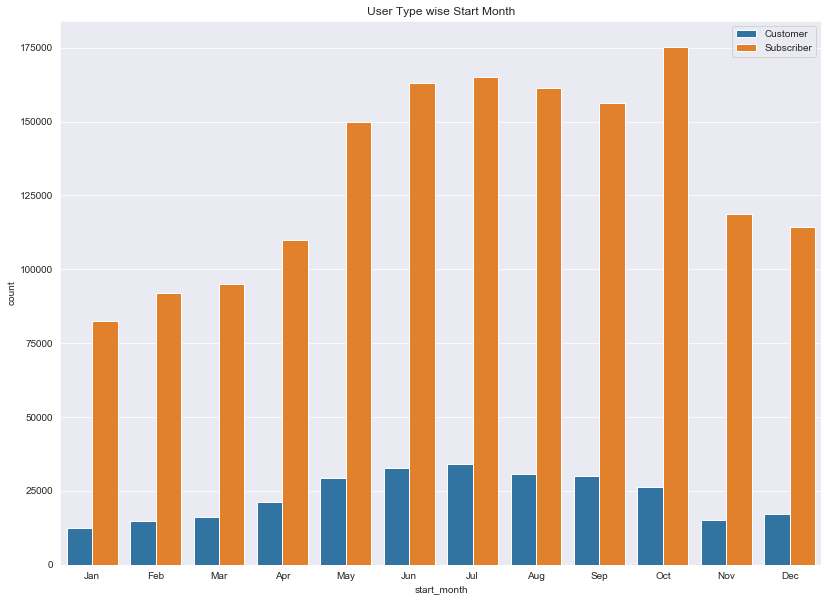

In [60]:
plt.figure(figsize = [30, 10])

# left plot: clustered bar chart, absolute counts
plt.subplot(1, 2, 1)
sns.countplot(data = df_new, x = 'start_month', hue = 'user_type')
plt.legend();
plt.title('User Type wise Start Month');

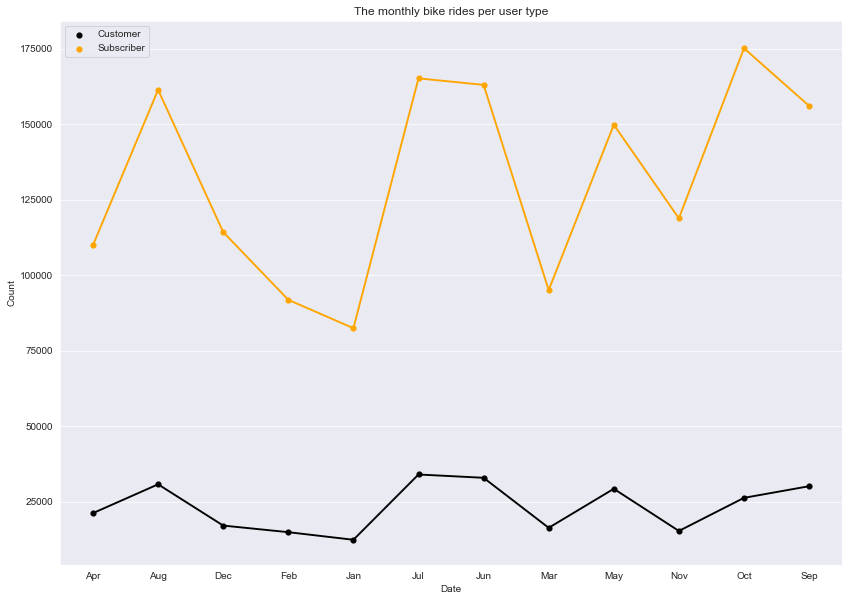

In [59]:
user_type_count = df_new.groupby(["start_month", "user_type"]).size().reset_index()
plt.figure(figsize=(14,10))
color = {'Subscriber':'orange', 'Customer':'black'}
axis = sns.pointplot(x='start_month', y=0, hue='user_type', palette=color, scale=.7, data=user_type_count)
plt.title('The monthly bike rides per user type')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend();

## Hourly Usage during Weekdays for Customers and Subscribers

>Different usage patterns/habits between the two types of riders are clearly seen. Subscribers used the system heavily on work days i.e. Monday through Friday, whereas customers ride a lot on weekends, especially in the afternoon. Many trips concentrated around 8-9am and 17-18pm on work days for subscribers when used for work commute, yet casual customers tended to use more in the late afternoon around 17pm Monday to Friday. Other than the different usage goals, it may also have to do with the traffic situation around these rush hours in the area.



<Figure size 432x288 with 0 Axes>

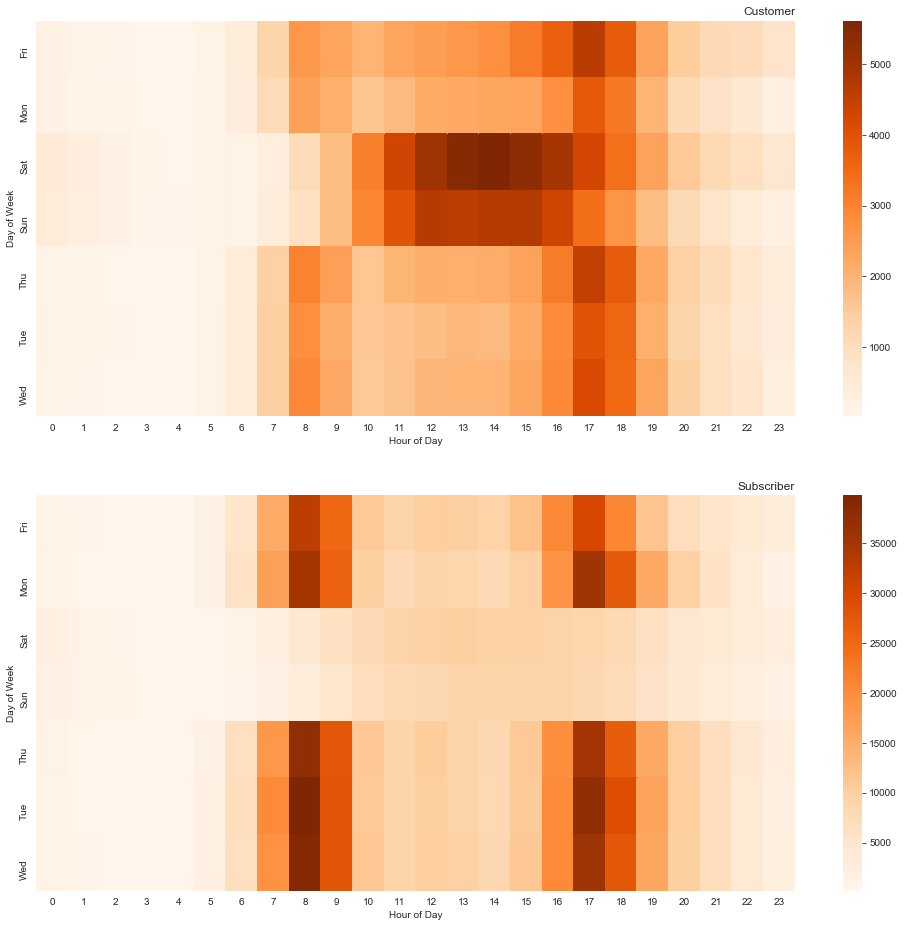

In [62]:
plt.suptitle('Hourly Usage during Weekdays for Customers and Subscribers')
#fig, ax = plt.subplots(figsize=(5,5)) 

plt.figure(figsize = (17,16))
plt.subplot(2, 1, 1)
customers = df_new.query('user_type == "Customer"')
ct_counts = customers.groupby(['start_week', 'start_hour']).size()
ct_counts = ct_counts.reset_index(name='count')
ct_counts = ct_counts.pivot(index='start_week', columns='start_hour', values='count')
sns.heatmap(ct_counts, cmap='Oranges');
plt.title('Customer', loc='right');
plt.xlabel('Hour of Day');
plt.ylabel('Day of Week');

plt.subplot(2, 1, 2)
subscribers = df_new.query('user_type == "Subscriber"')
st_counts = subscribers.groupby(['start_week', 'start_hour']).size()
st_counts = st_counts.reset_index(name='count')
st_counts = st_counts.pivot(index='start_week', columns='start_hour', values='count')
sns.heatmap(st_counts, cmap='Oranges');
plt.title('Subscriber', loc='right');
plt.xlabel('Hour of Day');
plt.ylabel('Day of Week');

## Summary

>There was a lot more subscribers using the bike sharing system than casual customers overall, both of which ride the most during the summer season and the least during the winter months. Obviously different usage patterns and riding habits are observed between the two types of riders. Subscribers used the system heavily on work days concentrated around 7-9am and 17-18pm for work commute, whereas customers ride a lot over weekends and in the afternoon for leisure/touring purposes. Subscribers tended to have much shorter/quicker trips compared to customers which makes subscriber usage more efficient.